Clinical Exome Sequencing is a test for identifying disease-causing DNA variants
It has been know that the offspring of consanguineous relationships are at greater risk of certain genetic disorders. For example, autosomal recessive disorders occur in individuals who are homozygous for a particular recessive gene mutation. This means that they carry two copies (alleles) of the same gene. Except in certain rare circumstances (new mutations or uniparental disomy) both parents of an individual with such a disorder will be carriers of the gene. Such carriers are not affected and will not display any signs that they are carriers, and so may be unaware that they carry the mutated gene. As relatives share a proportion of their genes, it is much more likely that related parents will be carriers of an autosomal recessive gene, and therefore their children are at a higher risk of an autosomal recessive disorder. The extent to which the risk increases depends on the degree of genetic relationship between the parents; so the risk is greater in mating relationships where the parents are close relatives, but for relationships between more distant relatives, such as second cousins, the risk is lower (although still greater than the general population). Here, I will analyse a dataset of clinical exome sequencing, which contains information such as disease causal genes (detected or not detected) and family tpyes (consanguineous, non-consanguineous, same village, or sporadic). We can ask the question, is disease causal gene associated with family type?


In [86]:
import pandas as pd

In [45]:
data = pd.read_csv(r'glpatientexomedatabase011.csv', index_col=None, low_memory=False)

In [48]:
# listing column names
list(data)

['GLIDNUM',
 'GLDISCODE',
 'PATIENTID',
 'DIAGNOSIS',
 'CAUSALGENES',
 'GENOTYPE',
 'NUCLEOTIDE',
 'EXOMESITE',
 'YROB',
 'GENDER',
 'ETHNICITY',
 'FAMILYTYPE',
 'YRENROLLED']

In [90]:
# listing unique values in columns of CAUSALGENES and FAMILYTYPE
col_CAUSALGENES = set(data['CAUSALGENES'])
col_FAMILYTYPE = set(data['FAMILYTYPE'])
print 'Column CAUSALGENES contains:', '\n', col_CAUSALGENES
print 'Column FAMILYTYPE contains:', '\n', col_FAMILYTYPE

Column CAUSALGENES contains: 
set(['Detected', 'Not Detected'])
Column FAMILYTYPE contains: 
set([nan, 'Sporadic', 'Consanguineous', 'Same Village', 'Non-consanguineous'])


In [51]:
# generating contingency table of observed counts
ct = pd.crosstab(data['CAUSALGENES'], data['FAMILYTYPE'])
print ct

FAMILYTYPE,Consanguineous,Non-consanguineous,Same Village,Sporadic
CAUSALGENES,,,,
Detected,2218,175,83,229
Not Detected,5279,1047,303,1505


In [52]:
# calculating column percentage
colsum = ct.sum(axis=0)
colpct = ct/colsum
print colpct

FAMILYTYPE,Consanguineous,Non-consanguineous,Same Village,Sporadic
CAUSALGENES,,,,
Detected,0.295852,0.143208,0.215026,0.132065
Not Detected,0.704148,0.856792,0.784974,0.867935


In [91]:
import scipy.stats as stat

# chi-square test of independence
cs = stat.chi2_contingency(ct)
print 'chi-square value, p value, expeted counts', '\n', cs

chi-square value, p value, expeted counts 
(289.86302379890162, 1.5544300966943123e-62, 3L, array([[ 1870.96457238,   304.96448012,    96.33084233,   432.74010518],
       [ 5626.03542762,   917.03551988,   289.66915767,  1301.25989482]]))


As we can see from the large chi-square value, and significant P value, causal gene and family type are significantly associated. In examining the column percents of each family type with causal gene, we see higher rates of causal gene among Consanguineous group (29.6%) and Same Village group (21.5%) than Non-consanguineous group (14.3%) and Sporadic group (13.2%). Next, I'll do post hoc tests to look at these groups separately. I'll use the post doc approach known as the Bonferroni Adjustment. Since there will be 6 pairs of comparison, the adjusted p value is 0.05 / 6 = 0.008.

In [80]:
# post hoc tests for chi-sqare test of independency
recode1 = {'Consanguineous': 'Consanguineous', 'Non-consanguineous': 'Non-consanguineous'}
data['COMPCONvNON'] = data['FAMILYTYPE'].map(recode1)

# contingency table of observed counts
ct1 = pd.crosstab(data['CAUSALGENES'], data['COMPCONvNON'])

# chi-square test
cs1 = stat.chi2_contingency(ct1)

print 'Consanguineous vs. Non-consanguineous', '\n', 'chi-square value, p value, expected counts', '\n', cs1

Consanguineous vs. Non-consanguineous 
chi-square value, p value, expected counts 
(122.17994955807615, 2.1082230233406736e-28, 1L, array([[ 2057.61222617,   335.38777383],
       [ 5439.38777383,   886.61222617]]))


In [81]:
# post hoc tests for chi-sqare tests of independency
recode2 = {'Consanguineous': 'Consanguineous', 'Same Village': 'Same Village'}
data['COMPCONvSV'] = data['FAMILYTYPE'].map(recode2)

# contingency table of observed counts
ct2 = pd.crosstab(data['CAUSALGENES'], data['COMPCONvSV'])

# chi-square test
cs2 = stat.chi2_contingency(ct2)

print 'Consanguineous vs. Same Village', '\n', 'chi-square value, p value, expected counts', '\n', cs2

Consanguineous vs. Same Village 
chi-square value, p value, expected counts 
(11.214963459777952, 0.00081140407363826828, 1L, array([[ 2188.32893568,   112.67106432],
       [ 5308.67106432,   273.32893568]]))


In [82]:
# post hoc tests for chi-sqare tests of independency
recode3 = {'Consanguineous': 'Consanguineous', 'Sporadic': 'Sporadic'}
data['COMPCONvSP'] = data['FAMILYTYPE'].map(recode3)

# contingency table of observed counts
ct3 = pd.crosstab(data['CAUSALGENES'], data['COMPCONvSP'])

# chi-square test
cs3 = stat.chi2_contingency(ct3)

print 'Consanguineous vs. Sporadic', '\n', 'chi-square value, p value, expected counts', '\n', cs3

Consanguineous vs. Sporadic 
chi-square value, p value, expected counts 
(193.08118120916544, 6.7577703671272454e-44, 1L, array([[ 1987.34254144,   459.65745856],
       [ 5509.65745856,  1274.34254144]]))


In [83]:
# post hoc tests for chi-sqare tests of independency
recode4 = {'Non-consanguineous': 'Non-consanguineous', 'Sporadic': 'Sporadic'}
data['COMPNONvSP'] = data['FAMILYTYPE'].map(recode4)

# contingency table of observed counts
ct4 = pd.crosstab(data['CAUSALGENES'], data['COMPNONvSP'])

# chi-square test
cs4 = stat.chi2_contingency(ct4)

print 'Non-consanguineous vs. Sporadic', '\n', 'chi-square value, p value, expected counts', '\n', cs4

Non-consanguineous vs. Sporadic 
chi-square value, p value, expected counts 
(0.66289067038087912, 0.41554127908261917, 1L, array([[  167.01217862,   236.98782138],
       [ 1054.98782138,  1497.01217862]]))


In [84]:
# post hoc tests for chi-sqare tests of independency
recode5 = {'Non-consanguineous': 'Non-consanguineous', 'Same Village': 'Same Village'}
data['COMPNONvSV'] = data['FAMILYTYPE'].map(recode5)

# contingency table of observed counts
ct5 = pd.crosstab(data['CAUSALGENES'], data['COMPNONvSV'])

# chi-square test
cs5 = stat.chi2_contingency(ct5)

print 'Non-consanguineous vs. Same Village', '\n', 'chi-square value, p value, expected counts', '\n', cs5

Non-consanguineous vs. Same Village 
chi-square value, p value, expected counts 
(10.705204745679863, 0.0010683456374215845, 1L, array([[  196.06716418,    61.93283582],
       [ 1025.93283582,   324.06716418]]))


In [85]:
# post hoc tests for chi-sqare tests of independency
recode6 = {'Same Village': 'Same Village', 'Sporadic': 'Sporadic'}
data['COMPSVvSP'] = data['FAMILYTYPE'].map(recode6)

# contingency table of observed counts
ct6 = pd.crosstab(data['CAUSALGENES'], data['COMPSVvSP'])

# chi-square test
cs6 = stat.chi2_contingency(ct6)

print 'Same Village vs. Sporadic', '\n', 'chi-square value, p value, expected counts', '\n', cs6

Same Village vs. Sporadic 
chi-square value, p value, expected counts 
(16.65824712451105, 4.4755299363058195e-05, 1L, array([[   56.80754717,   255.19245283],
       [  329.19245283,  1478.80754717]]))


In [89]:
enroll_df = data[['YRENROLLED']].dropna().astype(int)
enroll = enroll_df.groupby('YRENROLLED').size()
print enroll

YRENROLLED
1999       7
2000       7
2001      21
2002      27
2003      51
2004      95
2005     315
2006     188
2007     144
2008     404
2009     459
2010     464
2011     574
2012     721
2013    1084
2014    2181
2015    1270
2016    1568
2017     645
dtype: int64


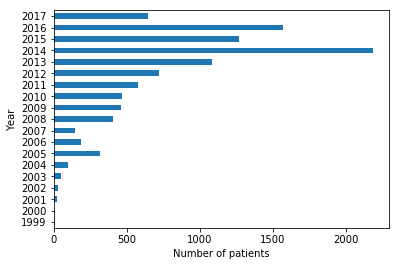

In [43]:
import matplotlib.pyplot as plt

enroll.plot(kind='barh')
plt.xlabel('Number of patients')
plt.ylabel('Year')
plt.show()